# PAM-seq 
## Metagenome VS PAM-seq (Gut microbiome analysis)
Taxonomy classification for the PAM-seq was done using qiime by Kai.
Metagenomic taxonomy classification was done using Metaphlan by Kai. 
Metagenomic data and PAM-seq data was subsampled at various read counts for direct comparison.
### Process
1. load and combine the raw data and the sumsample data
2. combine the metagenomics by taxa name
3. scatter plot at differet taxa level and choose the best
4. calculate the taxa abundance variation at different read depth
5. plot a dot plot for the variation
### Abundance estimation 
1. PAM-seq read count need to be normalized by the rRNA copy number
2. Metaphlan result need to be normalized by the genome size and the marker gene copy number 

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [83]:
wk_dir ='/home/xiangpeng/projects/16S_18S/code_for_github/data/gut/'
#wk_dir = '/home/xiangpeng/projects/16S_18S/gut/subsample/'
out_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/output/gut/'
meta_full_df= pd.read_csv(wk_dir + 'gut_meta_subsampling.csv', index_col=0)
pamseq_full_df = pd.read_csv(wk_dir + 'PAM-seq_gut_subsampling.csv', index_col=0)

In [84]:
pamseq_full_df.head()

,gut_combined_1000_1,gut_combined_1000_2,gut_combined_1000_3,gut_combined_1000_4,gut_combined_1000_5,gut_combined_10000_1,gut_combined_10000_2,gut_combined_10000_3,gut_combined_10000_4,gut_combined_10000_5,...,ASV,Kingdom,Phylum,Class,Order,Family,Genus,Species,Full_Taxon,Sequence
1,481,475,466,475,478,4750,4720,4642,4652,4698,...,0e47270f7ed2d4ab3fdab962963d475c,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Candida,Albicans,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|...,TCAACGCAAGCTGATGACTTGCGCTTACTAGGAATTCCTCGTTGAA...
2,447,460,459,461,454,4501,4529,4593,4574,4605,...,1a02eb53c4ddc63b830e8444aa45f306,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Candida,Albicans,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|...,AACTCACCAGGTCCAGACACAATAAGGATTGACAGATTGAGAGCTC...
3,0,0,0,0,0,0,0,0,0,0,...,1622ec87c9cbc6454b0ea7de100daac4,Eukaryota,Archaeplastida,Chloroplastida,Charophyta,Phragmoplastophyta,Streptophyta,Embryophyta,Eukaryota;Archaeplastida;Chloroplastida;Charop...,AACTTACCAGGTCCAGACATAGTGAGGATTGACAGATTGAGAGCTC...
4,0,0,0,0,0,0,0,0,0,0,...,9c466f69bb444375b17f9d8f8428f335,Eukaryota,SAR,Rhizaria,Retaria,Foraminifera,Globothalamea,Rotaliida,Eukaryota;SAR;Rhizaria;Retaria;Foraminifera;Gl...,TCAATGCAGATTGATGATCTGCGTTTACTAGGAATTCCTCGTTCAA...
5,0,0,0,0,0,0,0,0,0,0,...,194f23b079a8eb53e69d0a1ec92ff9cc,Eukaryota,Metazoa (Animalia),Arthropoda,Hexapoda,Ellipura,Collembola,Poduridae environmental sample,Eukaryota;Metazoa (Animalia);Arthropoda;Hexapo...,ATCTCACCAGGCCCGGACACTGGAAGGATTGACAGATTGAGAGCTC...


In [85]:
meta_full_df.head()

,Full_Taxon,read1000_rep1,read1000_rep2,read1000_rep3,read1000_rep4,read1000_rep5,read10000_rep1,read10000_rep2,read10000_rep3,read10000_rep4,...,read10000000_rep3,read10000000_rep4,read10000000_rep5,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,k__Bacteria|p__Actinobacteria|c__Actinobacteri...,0,2,0,2,0,5,5,5,5,...,2925,2980,2966,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces,Actinomyces_oris
1,k__Bacteria|p__Actinobacteria|c__Actinobacteri...,0,0,0,0,0,0,0,0,0,...,338,295,289,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces,Actinomyces_sp_oral_taxon_448
2,k__Bacteria|p__Actinobacteria|c__Actinobacteri...,0,0,0,0,0,2,1,2,1,...,1333,1334,1366,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Scardovia,Scardovia_wiggsiae
3,k__Bacteria|p__Actinobacteria|c__Actinobacteri...,0,0,0,0,0,0,0,0,0,...,339,345,359,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Rothia,Rothia_dentocariosa
4,k__Bacteria|p__Actinobacteria|c__Actinobacteri...,1,0,0,0,0,2,3,1,3,...,2425,2467,2398,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Rothia,Rothia_mucilaginosa


In [86]:
genus_kingdom_dict = meta_full_df.set_index('Genus')['Kingdom'].to_dict()


In [87]:
gut_sample_ls = ['gut_combined_10000000_1', 'gut_combined_10000000_2', 
                 'gut_combined_10000000_3', 'gut_combined_10000000_4', 
                 'gut_combined_10000000_5',
                ]
pam_seq_10M = pamseq_full_df[gut_sample_ls]
taxa_ls = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
pam_seq_10M[taxa_ls] = pamseq_full_df[taxa_ls].fillna('unknown')
pam_seq_10M.head()


/tmp/ipykernel_8246/684291922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pam_seq_10M[taxa_ls] = pamseq_full_df[taxa_ls].fillna('unknown')
/tmp/ipykernel_8246/684291922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pam_seq_10M[taxa_ls] = pamseq_full_df[taxa_ls].fillna('unknown')
/tmp/ipykernel_8246/684291922.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,gut_combined_10000000_1,gut_combined_10000000_2,gut_combined_10000000_3,gut_combined_10000000_4,gut_combined_10000000_5,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,4682010,4680623,4682517,4685905,4684062,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Candida,Albicans
2,4570851,4572192,4571339,4567795,4570156,Eukaryota,Ascomycota,Saccharomycetes,Saccharomycetales,Debaryomycetaceae,Candida,Albicans
3,992,1011,1007,1048,1041,Eukaryota,Archaeplastida,Chloroplastida,Charophyta,Phragmoplastophyta,Streptophyta,Embryophyta
4,488,511,459,460,494,Eukaryota,SAR,Rhizaria,Retaria,Foraminifera,Globothalamea,Rotaliida
5,538,531,516,528,523,Eukaryota,Metazoa (Animalia),Arthropoda,Hexapoda,Ellipura,Collembola,Poduridae environmental sample


In [88]:
pamseq_full_df['gut_total']=pamseq_full_df[gut_sample_ls].sum(axis=1)

taxa_ls = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
pamseq_full_df[taxa_ls] = pamseq_full_df[taxa_ls].fillna('unknown')

### rRNA reads normalize to read copy number

rrnDB data downloaded from https://rrndb.umms.med.umich.edu/static/download/
saved in folder: /home/xiangpeng/projects/16S_18S/rrnDB/
rrnDB-5.8_pantaxa_stats_NCBI.tsv.zip


In [89]:
#load the 16s copy number data
rrnDB_dir = '/home/xiangpeng/projects/16S_18S/rrnDB/'
rrnDB = pd.read_csv(rrnDB_dir+'rrnDB-5.8_pantaxa_stats_NCBI.tsv',delimiter='\t', index_col=0)

In [90]:
rrnDB.head()

,rank,name,childcount,min,max,mode,median,mean,stddev,sum16slist
taxid,,,,,,,,,,
33995,species,Komagataeibacter europaeus,2,4,5,NaN,4.5,4.5,0.50,"[4, 5]"
28448,species,Komagataeibacter xylinus,5,4,5,5.0,5.0,4.6,0.49,"[4, 4, 5, 5, 5]"
29552,species,Haploplasma axanthum,2,2,2,2.0,2.0,2.0,0.00,"[2, 2]"
264635,species,Acholeplasma granularum,1,2,2,2.0,2.0,2.0,0.00,[2]
472,species,Acinetobacter sp.,1,7,7,7.0,7.0,7.0,0.00,[7]


In [91]:

rename_rank = {'species': 'Species', 
               'genus': 'Genus', 
               'family': 'Family', 
               'order': 'Order', 
               'class':'Class', 
               'phylum':'Phylum',
               'superkingdom':'Kingdom'
              }
rrnDB['rank'] = rrnDB['rank'].map(rename_rank)
rrnDB['rank'].unique()
ls = ['Kingdom','Phylum','Class','Order','Family','Genus','Species',]

In [92]:
# find 16S rRNA gene copy numbers
pamseq_full_df['16s_copy']=np.nan
for rank in ['Species', 'Genus', 'Family', 'Order', 'Class', 'Phylum', 'Kingdom']:
    # if the 16S copy at the lower taxon level is not available, then asign it with the 16S copy number of a higher level 
    rrna_copy_dict = rrnDB[rrnDB['rank']==rank].set_index('name')['mean'].to_dict()
    
    pamseq_full_df.loc[pamseq_full_df['16s_copy'].isna(),'16s_copy'] = pamseq_full_df.loc[pamseq_full_df['16s_copy'].isna(),rank].map(rrna_copy_dict)
    print(rank, pamseq_full_df.loc[pamseq_full_df['16s_copy'].isna()].shape)

Species (37810, 62)
Genus (26014, 62)
Family (20199, 62)
Order (15954, 62)
Class (13690, 62)
Phylum (11103, 62)
Kingdom (8863, 62)


In [93]:
# use the genus level average to assign the result. 
rrna_copy_dict = rrnDB[rrnDB['rank']=='phylum'].set_index('name')['mean'].to_dict()

pamseq_full_df['16s_copy'] = pamseq_full_df['Genus'].map(rrna_copy_dict)

#### C. albicans copy numbers
```
ref: https://journals.asm.org/doi/epdf/10.1128/jb.175.22.7189-7199.1993
table 1: the copy number of rRNA units: [132,116,222,87,85,75,63,56,128,106,106], average =106.9091


In [108]:
# assume all the eukaryota species has a 18s copy number as 106.9091

pamseq_full_df.loc[pamseq_full_df['Kingdom']=='Eukaryota','16s_copy']=106.9091
pamseq_full_df['16s_copy']=pamseq_full_df['16s_copy'].fillna(1)

In [96]:
meta_full_df = meta_full_df.fillna('unknown')
meta_full_df.columns


Index(['Full_Taxon', 'read1000_rep1', 'read1000_rep2', 'read1000_rep3',
       'read1000_rep4', 'read1000_rep5', 'read10000_rep1', 'read10000_rep2',
       'read10000_rep3', 'read10000_rep4', 'read10000_rep5', 'read100000_rep1',
       'read100000_rep2', 'read100000_rep3', 'read100000_rep4',
       'read100000_rep5', 'read1000000_rep1', 'read1000000_rep2',
       'read1000000_rep3', 'read1000000_rep4', 'read1000000_rep5',
       'read10000000_rep1', 'read10000000_rep2', 'read10000000_rep3',
       'read10000000_rep4', 'read10000000_rep5', 'Kingdom', 'Phylum', 'Class',
       'Order', 'Family', 'Genus', 'Species'],
      dtype='object')

In [97]:
meta_full_df.columns

Index(['Full_Taxon', 'read1000_rep1', 'read1000_rep2', 'read1000_rep3',
       'read1000_rep4', 'read1000_rep5', 'read10000_rep1', 'read10000_rep2',
       'read10000_rep3', 'read10000_rep4', 'read10000_rep5', 'read100000_rep1',
       'read100000_rep2', 'read100000_rep3', 'read100000_rep4',
       'read100000_rep5', 'read1000000_rep1', 'read1000000_rep2',
       'read1000000_rep3', 'read1000000_rep4', 'read1000000_rep5',
       'read10000000_rep1', 'read10000000_rep2', 'read10000000_rep3',
       'read10000000_rep4', 'read10000000_rep5', 'Kingdom', 'Phylum', 'Class',
       'Order', 'Family', 'Genus', 'Species'],
      dtype='object')

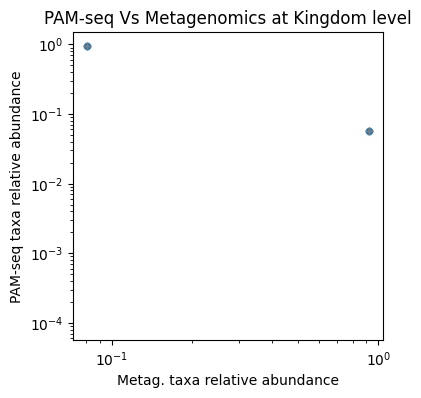

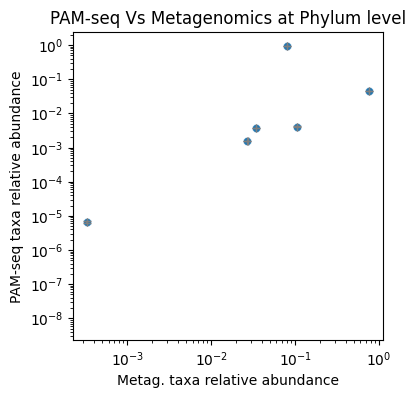

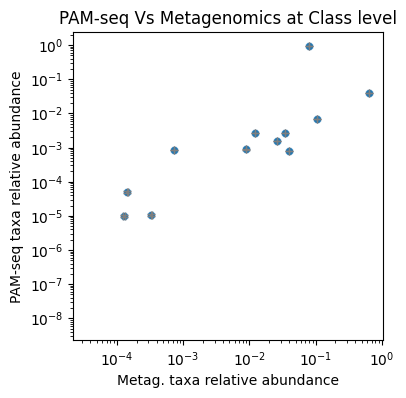

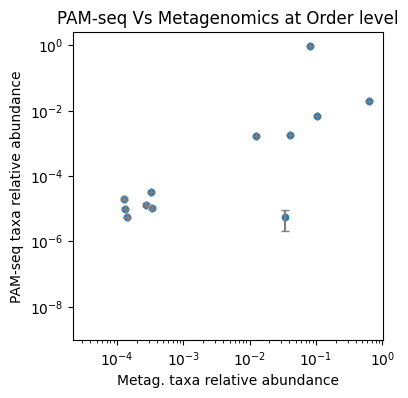

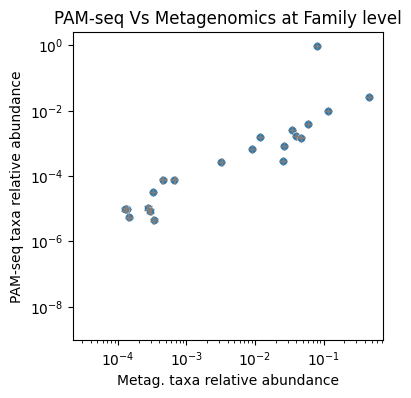

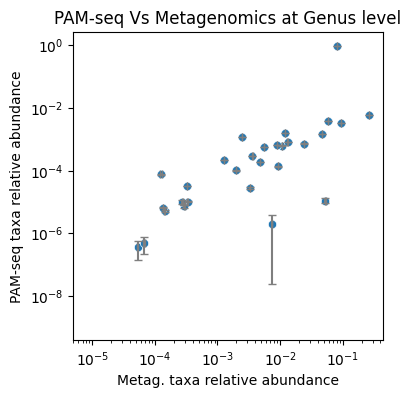

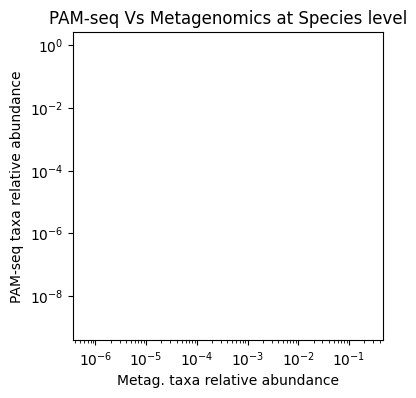

In [98]:
meta_10M_ls =['read10000000_rep1', 'read10000000_rep2', 'read10000000_rep3','read10000000_rep4', 'read10000000_rep5']
for t in taxa_ls:
    meta = meta_full_df.groupby(by=t)[meta_10M_ls].sum()[meta_10M_ls]
    pam = pamseq_full_df.groupby(by=t)[gut_sample_ls].sum()[gut_sample_ls]
    combine_df = pd.concat([meta, pam], axis=1).fillna(0)
    combine_df = combine_df.loc[~(combine_df == 0).all(axis=1)]
    combine_df.to_csv(out_dir+ 'gut_meta_pam_10M_at_{}_read_count.csv'.format(t))
    combined_df_relabd = combine_df.div(combine_df.sum()) # relative abundance
    combined_df_relabd['meta_mean']=combined_df_relabd[meta_10M_ls].mean(axis=1)
    combined_df_relabd['pam_mean']=combined_df_relabd[gut_sample_ls].mean(axis=1)
    combined_df_relabd['meta_std']=combined_df_relabd[meta_10M_ls].std(axis=1)
    combined_df_relabd['pam_std']=combined_df_relabd[gut_sample_ls].std(axis=1)
    combined_df_relabd.to_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd.csv'.format(t))

    plt.figure(figsize=(4, 4))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )


    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()

Eukaryota 0.08073484 0.9347008099659608


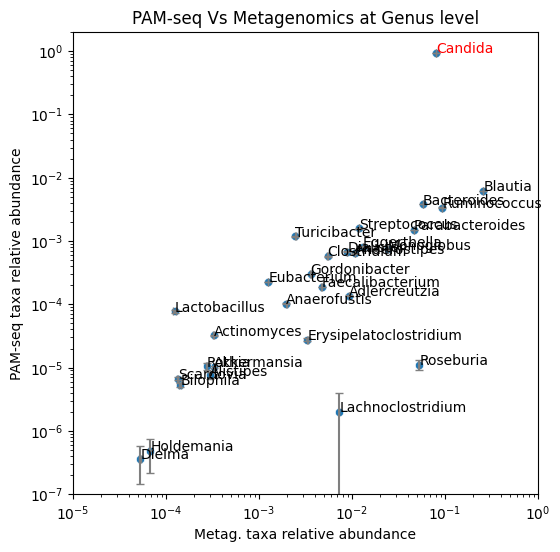

In [125]:
for t in ['Genus']:

    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd.csv'.format(t), index_col=0)

    plt.figure(figsize=(6,6))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )
    plt.xlim(0.00001,1)
    plt.ylim(0.0000001,2)
    # Add labels at each point using iloc
    #for i, label in enumerate(combined_df_relabd.index):
     #   plt.text(combined_df_relabd['meta_mean'].iloc[i], combined_df_relabd['pam_mean'].iloc[i], label)
    for i, label in enumerate(combined_df_relabd.index):
        x = combined_df_relabd['meta_mean'].iloc[i]
        y = combined_df_relabd['pam_mean'].iloc[i]
    
        try: 
            g = genus_kingdom_dict[label]
        
            if g != 'Bacteria':
                print(g, x, y)
                plt.text(x, y, label, c = 'red')
            elif (x !=0) &(y!=0):
                plt.text(x, y, label)
        except:
            KeyError

    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log_with_label_not_normal.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()


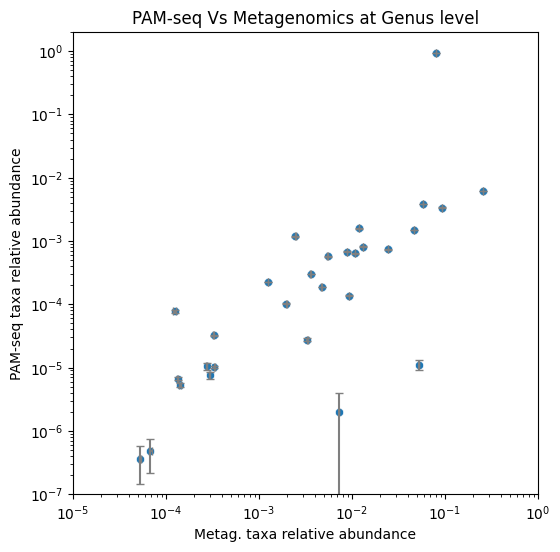

In [129]:
for t in ['Genus']:

    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd.csv'.format(t), index_col=0)

    plt.figure(figsize=(6,6))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )
    plt.xlim(0.00001,1)
    plt.ylim(0.0000001,2)
    # Add labels at each point using iloc
    #for i, label in enumerate(combined_df_relabd.index):
     #   plt.text(combined_df_relabd['meta_mean'].iloc[i], combined_df_relabd['pam_mean'].iloc[i], label)
    

    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log_without_label_not_normal.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()


In [134]:
combined_df_relabd.head(13)

,read10000000_rep1,read10000000_rep2,read10000000_rep3,read10000000_rep4,read10000000_rep5,gut_combined_10000000_1,gut_combined_10000000_2,gut_combined_10000000_3,gut_combined_10000000_4,gut_combined_10000000_5,meta_mean,pam_mean,meta_std,pam_std
Genus,,,,,,,,,,,,,,
Actinomyces,0.000325,0.000333,0.000326,0.000327,0.000325,0.000032,0.000033,0.000032,0.000031,0.000033,0.000327,0.000032,0.000003,7.046733e-07
Adlercreutzia,0.009297,0.009246,0.009266,0.009258,0.009258,0.000139,0.000136,0.000139,0.000135,0.000136,0.009265,0.000137,0.000019,1.908215e-06
Agathobaculum,0.004783,0.004773,0.004756,0.004793,0.004755,0.000000,0.000000,0.000000,0.000000,0.000000,0.004772,0.000000,0.000017,0.000000e+00
Akkermansia,0.000336,0.000336,0.000332,0.000332,0.000330,0.000010,0.000010,0.000010,0.000010,0.000011,0.000333,0.000010,0.000003,3.313324e-07
Alistipes,0.000293,0.000302,0.000292,0.000297,0.000296,0.000007,0.000009,0.000007,0.000007,0.000008,0.000296,0.000007,0.000004,8.677347e-07
Anaerofustis,0.001980,0.001969,0.001983,0.001984,0.001986,0.000102,0.000105,0.000103,0.000100,0.000103,0.001980,0.000103,0.000006,2.034726e-06
Anaeromassilibacillus,0.000427,0.000438,0.000422,0.000426,0.000428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000428,0.000000,0.000006,0.000000e+00
Anaerostipes,0.010858,0.010871,0.010882,0.010874,0.010847,0.000636,0.000638,0.000630,0.000638,0.000633,0.010867,0.000635,0.000014,3.245127e-06
Bacteroides,0.058465,0.058383,0.058514,0.058456,0.058477,0.003811,0.003804,0.003792,0.003809,0.003773,0.058459,0.003798,0.000048,1.563053e-05


In [123]:
min_abd = 0.000001
filtered_abd = combined_df_relabd[(combined_df_relabd['meta_mean']>=min_abd)&(combined_df_relabd['pam_mean']>=min_abd)]
from scipy import stats
print(filtered_abd[['meta_mean', 'pam_mean']].corr())
print(stats.ttest_ind(filtered_abd['meta_mean'],filtered_abd['pam_mean']))
filtered_abd.shape

           meta_mean  pam_mean
meta_mean   1.000000  0.211841
pam_mean    0.211841  1.000000
TtestResult(statistic=np.float64(-0.26097616263949563), pvalue=np.float64(0.7951417023526702), df=np.float64(52.0))


(27, 14)

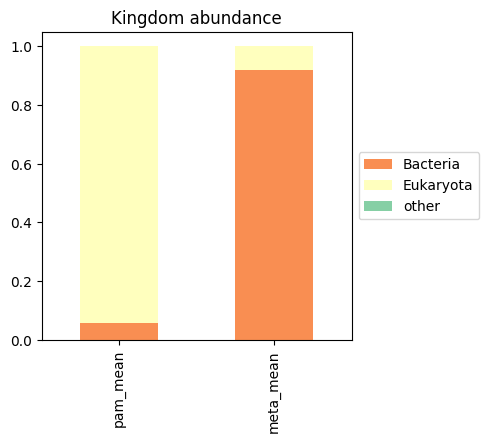

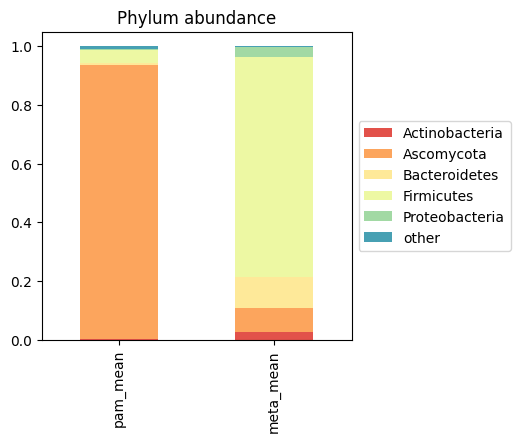

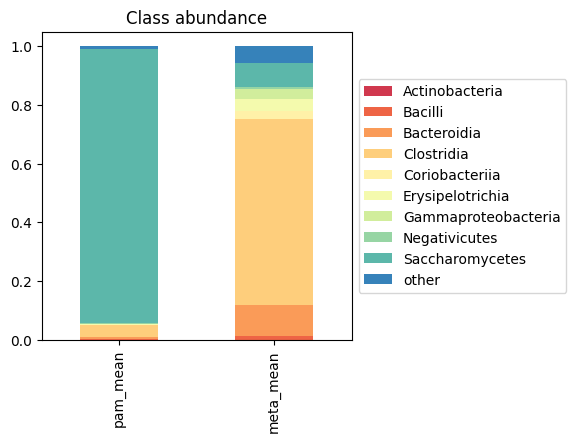

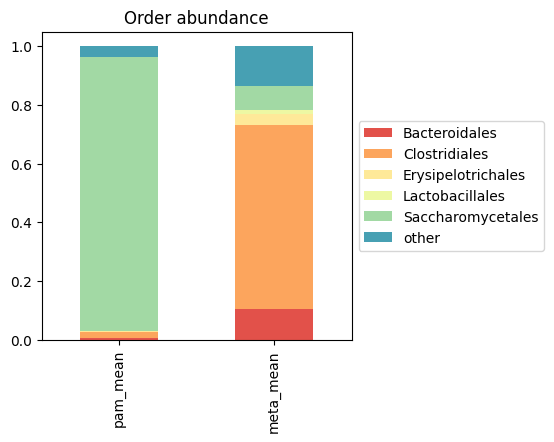

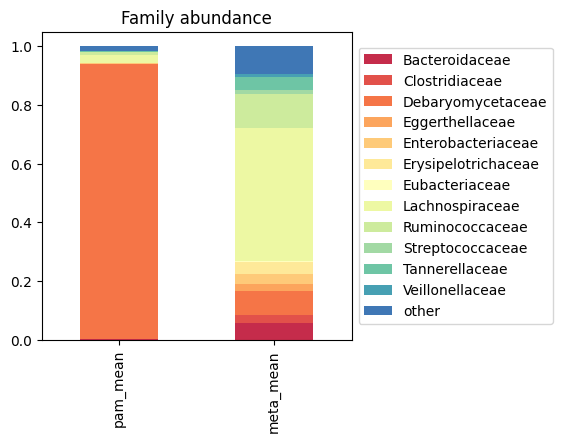

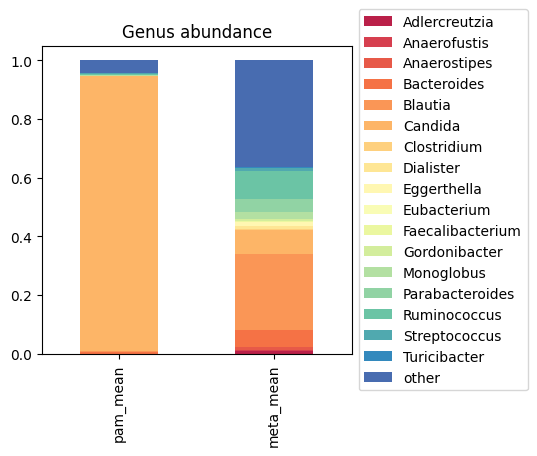

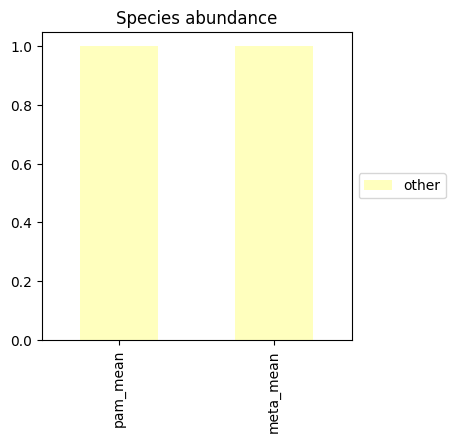

In [116]:
for t in taxa_ls:
    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd.csv'.format(t), index_col=0)
    
    # plot the bar plot    
    min_tax_abd = 0.0001
    combined_df_relabd['taxon'] = combined_df_relabd.index
    combined_df_relabd.loc[(combined_df_relabd['pam_mean']<=min_tax_abd)|(combined_df_relabd['meta_mean']<=min_tax_abd), 'taxon']='other'
    relabd=combined_df_relabd[['pam_mean', 'meta_mean','taxon']].groupby(by='taxon').sum()

    # Choose a Seaborn color palette
    palette = sns.color_palette("Spectral", n_colors=len(relabd.index))

    # Convert the palette to a list of colors
    colors = palette.as_hex()

    # Plot the DataFrame with the chosen color palette
    relabd.T.plot(kind='bar',stacked=True, figsize=(4,4), color =colors )
    plt.title('{} abundance'.format(t), color='black')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_at_{}_level_not_normalized_stacked_bar.pdf'.format(t), bbox_inches='tight')
    plt.show()

In [99]:
pamseq_full_df['16s_copy'] = pamseq_full_df['16s_copy'].fillna(1)
for rep in gut_sample_ls:
    pamseq_full_df[rep] =pamseq_full_df[rep].div(pamseq_full_df['16s_copy'])


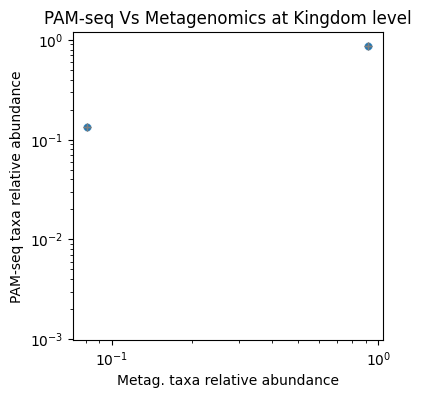

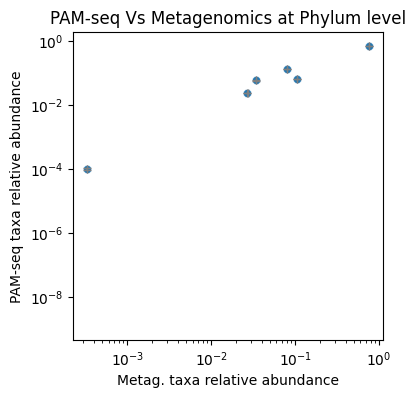

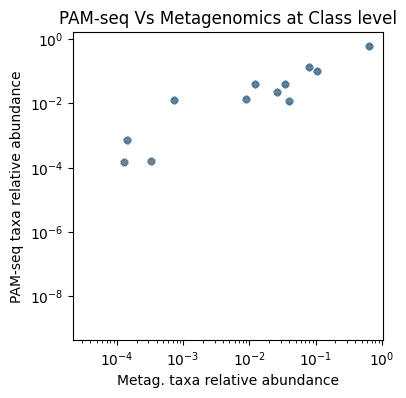

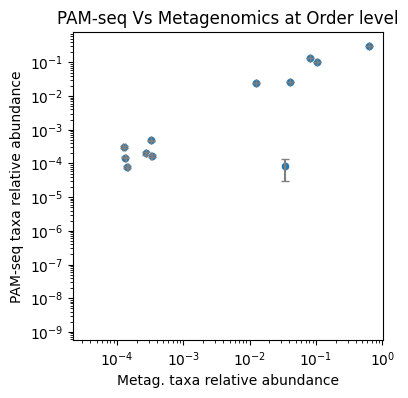

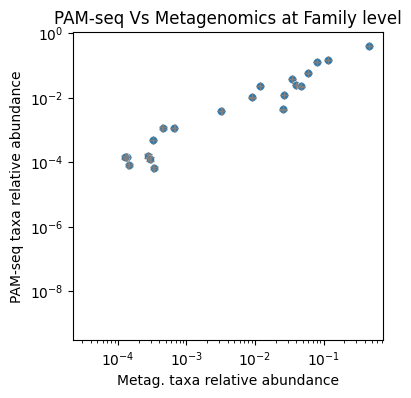

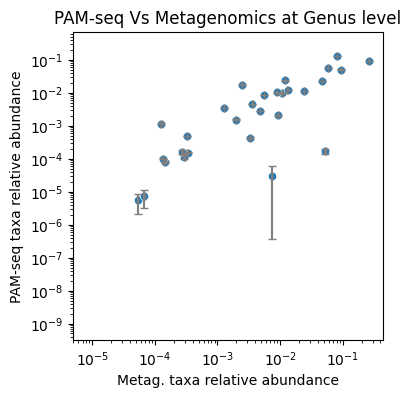

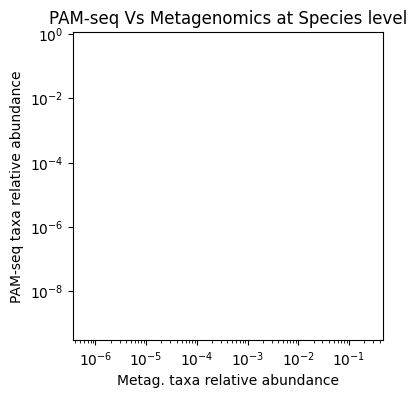

In [100]:
for t in taxa_ls:
    meta = meta_full_df.groupby(by=t)[meta_10M_ls].sum()[meta_10M_ls]
    pam = pamseq_full_df.groupby(by=t)[gut_sample_ls].sum()[gut_sample_ls]
    combine_df = pd.concat([meta, pam], axis=1).fillna(0)
    combine_df = combine_df.loc[~(combine_df == 0).all(axis=1)]
    combine_df.to_csv(out_dir+ 'gut_meta_pam_10M_at_{}_read_count_normalized.csv'.format(t))
    combined_df_relabd = combine_df.div(combine_df.sum()) # relative abundance
    combined_df_relabd['meta_mean']=combined_df_relabd[meta_10M_ls].mean(axis=1)
    combined_df_relabd['pam_mean']=combined_df_relabd[gut_sample_ls].mean(axis=1)
    combined_df_relabd['meta_std']=combined_df_relabd[meta_10M_ls].std(axis=1)
    combined_df_relabd['pam_std']=combined_df_relabd[gut_sample_ls].std(axis=1)
    combined_df_relabd.to_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd_normalized.csv'.format(t))

    plt.figure(figsize=(4, 4))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )


    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()


Eukaryota 0.08073484 0.1317763141536022


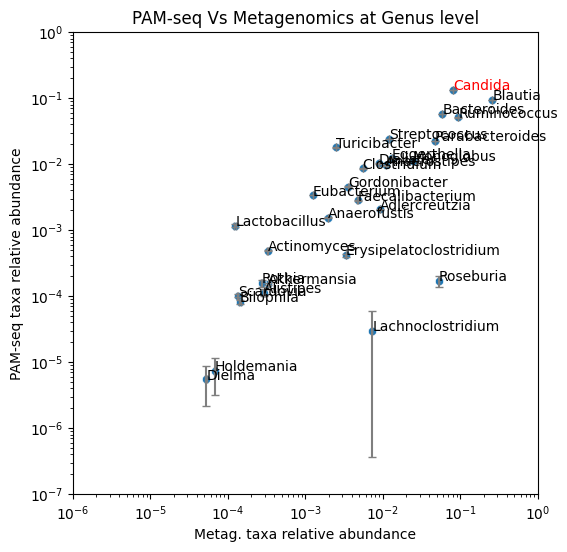

In [126]:
for t in ['Genus']:

    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd_normalized.csv'.format(t), index_col=0)

    plt.figure(figsize=(6,6))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )
    plt.xlim(0.000001,1)
    plt.ylim(0.0000001,1)
    # Add labels at each point using iloc
    #for i, label in enumerate(combined_df_relabd.index):
     #   plt.text(combined_df_relabd['meta_mean'].iloc[i], combined_df_relabd['pam_mean'].iloc[i], label)
    for i, label in enumerate(combined_df_relabd.index):
        x = combined_df_relabd['meta_mean'].iloc[i]
        y = combined_df_relabd['pam_mean'].iloc[i]
    
        try: 
            g = genus_kingdom_dict[label]
        
            if g != 'Bacteria':
                print(g, x, y)
                plt.text(x, y, label, c = 'red')
            elif (x !=0) &(y!=0):
                plt.text(x, y, label)
        except:
            KeyError

    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log_with_label.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()


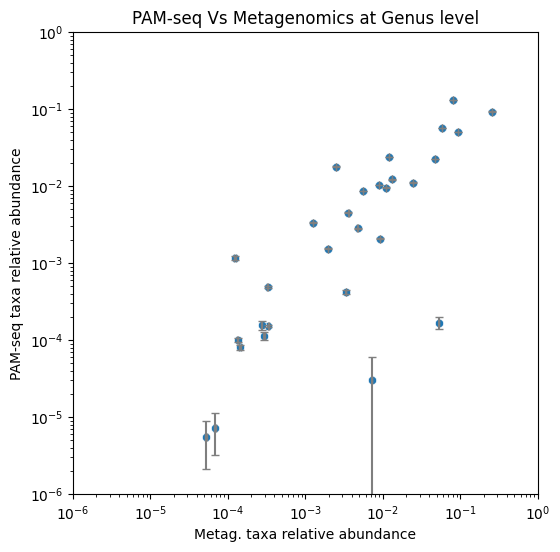

In [127]:
for t in ['Genus']:

    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd_normalized.csv'.format(t), index_col=0)

    plt.figure(figsize=(6,6))
    sns.scatterplot(x='meta_mean', y='pam_mean', data=combined_df_relabd)

    # Add titles and labels
    plt.title('PAM-seq Vs Metagenomics at {} level'.format(t))
    plt.ylabel('PAM-seq taxa relative abundance')
    plt.xlabel('Metag. taxa relative abundance')
    plt.errorbar(combined_df_relabd['meta_mean'], combined_df_relabd['pam_mean'], 
                 xerr=combined_df_relabd['meta_std'], 
                 yerr=combined_df_relabd['pam_std'], 
                 #fmt='o', 
                 #color='grey', 
                 ecolor='Tab:grey', 
                 capsize=3,
                 linestyle='None'
                )
    plt.xlim(0.000001,1)
    plt.ylim(0.000001,1)
  

    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_10M_at_{}_level_log_without_label.pdf'.format(t), bbox_inches='tight')

    # Display the plot
    
    plt.show()


In [128]:
min_abd = 0.0001
filtered_abd = combined_df_relabd[(combined_df_relabd['meta_mean']>=min_abd)&(combined_df_relabd['pam_mean']>=min_abd)]
from scipy import stats
print(filtered_abd[['meta_mean', 'pam_mean']].corr())
# Calculate Pearson correlation and p-value
r, p_value = stats.pearsonr(filtered_abd['meta_mean'], filtered_abd['pam_mean'])

print(f"Pearson correlation coefficient: {r}")
print(f"P-value: {p_value}")

           meta_mean  pam_mean
meta_mean    1.00000   0.74778
pam_mean     0.74778   1.00000
Pearson correlation coefficient: 0.747780466931266
P-value: 1.733067353921445e-05


In [103]:
filtered_abd

,read10000000_rep1,read10000000_rep2,read10000000_rep3,read10000000_rep4,read10000000_rep5,gut_combined_10000000_1,gut_combined_10000000_2,gut_combined_10000000_3,gut_combined_10000000_4,gut_combined_10000000_5,meta_mean,pam_mean,meta_std,pam_std
Genus,,,,,,,,,,,,,,
Actinomyces,0.000325,0.000333,0.000326,0.000327,0.000325,0.000487,0.000503,0.000482,0.000474,0.000490,0.000327,0.000487,0.000003,0.000011
Adlercreutzia,0.009297,0.009246,0.009266,0.009258,0.009258,0.002097,0.002055,0.002095,0.002042,0.002047,0.009265,0.002067,0.000019,0.000027
Akkermansia,0.000336,0.000336,0.000332,0.000332,0.000330,0.000146,0.000157,0.000152,0.000157,0.000158,0.000333,0.000154,0.000003,0.000005
Alistipes,0.000293,0.000302,0.000292,0.000297,0.000296,0.000105,0.000134,0.000106,0.000102,0.000117,0.000296,0.000113,0.000004,0.000013
Anaerofustis,0.001980,0.001969,0.001983,0.001984,0.001986,0.001533,0.001583,0.001549,0.001502,0.001559,0.001980,0.001545,0.000006,0.000030
Anaerostipes,0.010858,0.010871,0.010882,0.010874,0.010847,0.009577,0.009616,0.009490,0.009628,0.009540,0.010867,0.009570,0.000014,0.000057
Bacteroides,0.058465,0.058383,0.058514,0.058456,0.058477,0.057384,0.057371,0.057088,0.057493,0.056863,0.058459,0.057240,0.000048,0.000259
Blautia,0.259322,0.259313,0.259518,0.259174,0.259352,0.092835,0.093512,0.092759,0.092984,0.092884,0.259336,0.092995,0.000123,0.000300
Candida,0.080768,0.080666,0.080755,0.080742,0.080744,0.131633,0.131848,0.131616,0.132013,0.131772,0.080735,0.131776,0.000040,0.000164


In [104]:
combined_df_relabd

,read10000000_rep1,read10000000_rep2,read10000000_rep3,read10000000_rep4,read10000000_rep5,gut_combined_10000000_1,gut_combined_10000000_2,gut_combined_10000000_3,gut_combined_10000000_4,gut_combined_10000000_5,meta_mean,pam_mean,meta_std,pam_std
Genus,,,,,,,,,,,,,,
Actinomyces,0.000325,0.000333,0.000326,0.000327,0.000325,0.000487,0.000503,0.000482,0.000474,0.000490,0.000327,4.871626e-04,0.000003,0.000011
Adlercreutzia,0.009297,0.009246,0.009266,0.009258,0.009258,0.002097,0.002055,0.002095,0.002042,0.002047,0.009265,2.067377e-03,0.000019,0.000027
Agathobaculum,0.004783,0.004773,0.004756,0.004793,0.004755,0.000000,0.000000,0.000000,0.000000,0.000000,0.004772,0.000000e+00,0.000017,0.000000
Akkermansia,0.000336,0.000336,0.000332,0.000332,0.000330,0.000146,0.000157,0.000152,0.000157,0.000158,0.000333,1.540688e-04,0.000003,0.000005
Alistipes,0.000293,0.000302,0.000292,0.000297,0.000296,0.000105,0.000134,0.000106,0.000102,0.000117,0.000296,1.129634e-04,0.000004,0.000013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pItb-vmat-80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000015,0.000009,0.000023,0.000009,0.000000,1.340200e-05,0.000000,0.000006
possible,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.000017,0.000014,0.000015,0.000005,0.000000,1.309328e-05,0.000000,0.000005
uncultured,0.000000,0.000000,0.000000,0.000000,0.000000,0.042020,0.042791,0.042081,0.042506,0.042441,0.000000,4.236772e-02,0.000000,0.000319


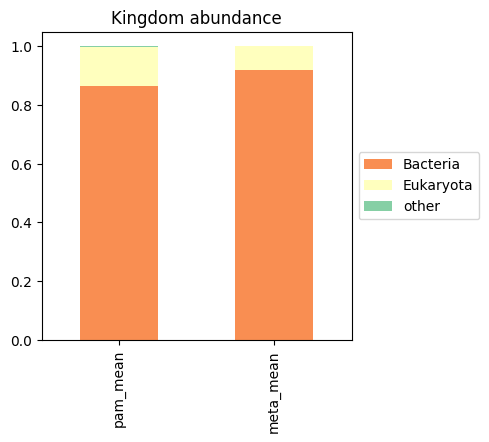

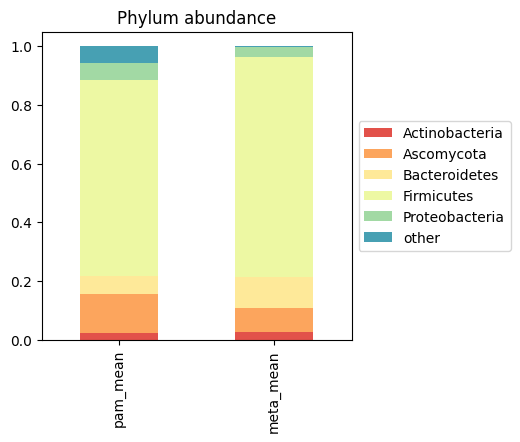

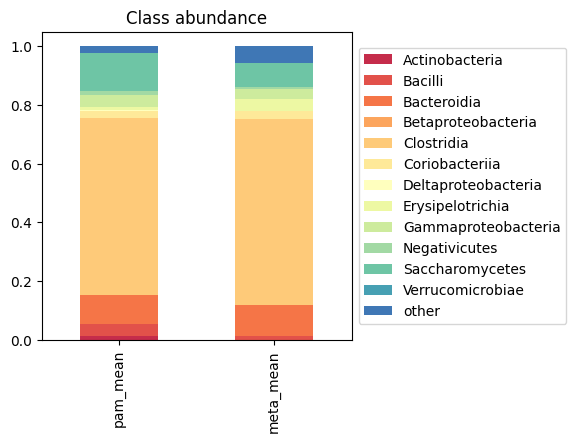

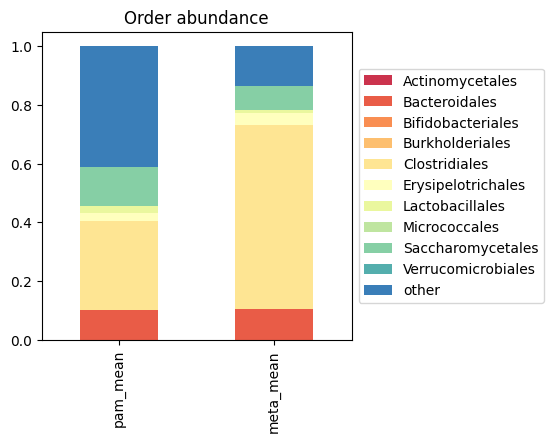

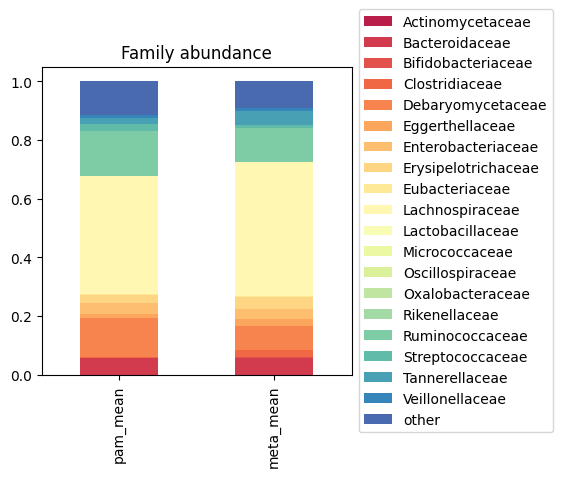

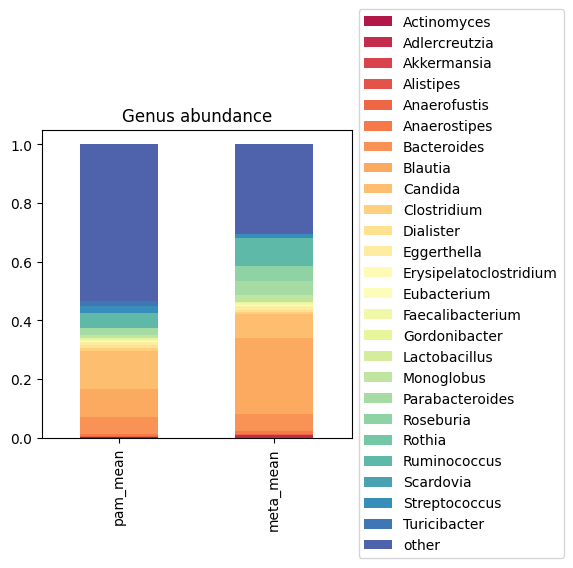

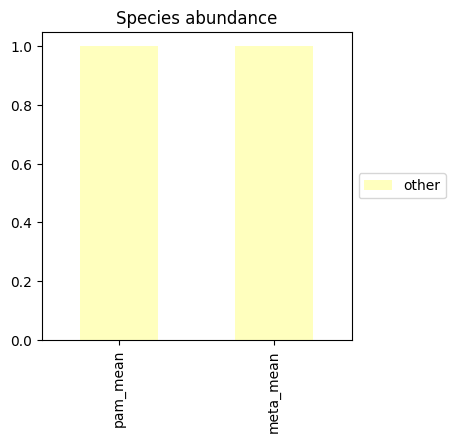

In [105]:
for t in taxa_ls:
    combined_df_relabd = pd.read_csv(out_dir+ 'gut_meta_pam_10M_at_{}_realative_abd_normalized.csv'.format(t), index_col=0)
    
    # plot the bar plot    
    min_tax_abd = 0.0001
    combined_df_relabd['taxon'] = combined_df_relabd.index
    combined_df_relabd.loc[(combined_df_relabd['pam_mean']<=min_tax_abd)|(combined_df_relabd['meta_mean']<=min_tax_abd), 'taxon']='other'
    relabd=combined_df_relabd[['pam_mean', 'meta_mean','taxon']].groupby(by='taxon').sum()

    # Choose a Seaborn color palette
    palette = sns.color_palette("Spectral", n_colors=len(relabd.index))

    # Convert the palette to a list of colors
    colors = palette.as_hex()

    # Plot the DataFrame with the chosen color palette
    relabd.T.plot(kind='bar',stacked=True, figsize=(4,4), color =colors )
    plt.title('{} abundance'.format(t), color='black')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(out_dir+'PAM-seq_Vs_Metagenomics_at_{}_level_stacked_bar.pdf'.format(t), bbox_inches='tight')
    plt.show()